# Day 08. Exercise 05
# Clustering

## 0. Imports

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import joblib 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [3]:
df=pd.read_csv('../data/regression.csv')
df.drop(columns='pageviews', inplace=True)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
x=df[['num_commits', 'AVG(diff)']]
kmeans=KMeans(random_state=21, n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=21)

In [7]:
l=kmeans.labels_
l

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1], dtype=int32)

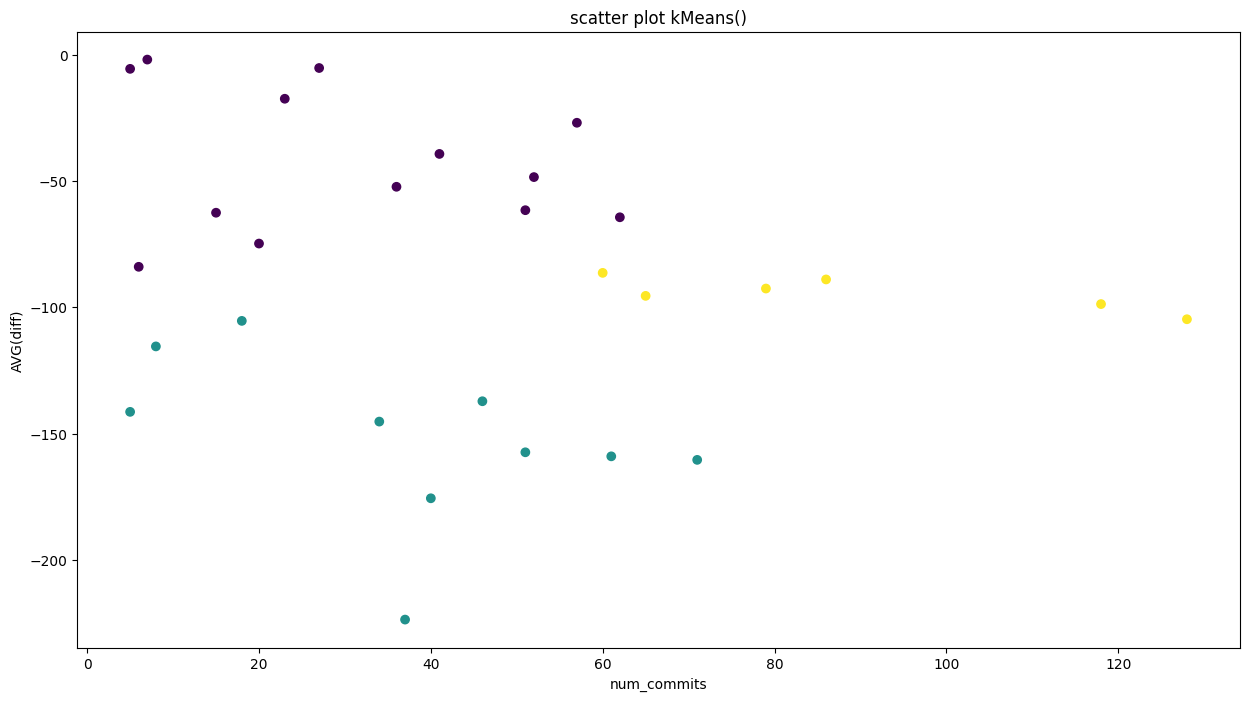

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=l)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot kMeans()')
plt.show()

In [12]:
silhouette = silhouette_score(x, kmeans.labels_)
print(silhouette)

0.4454402135233297


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [59]:
db = DBSCAN(eps=20, min_samples=2)
db.fit(x)

DBSCAN(eps=20, min_samples=2)

In [61]:
ldb=db.labels_

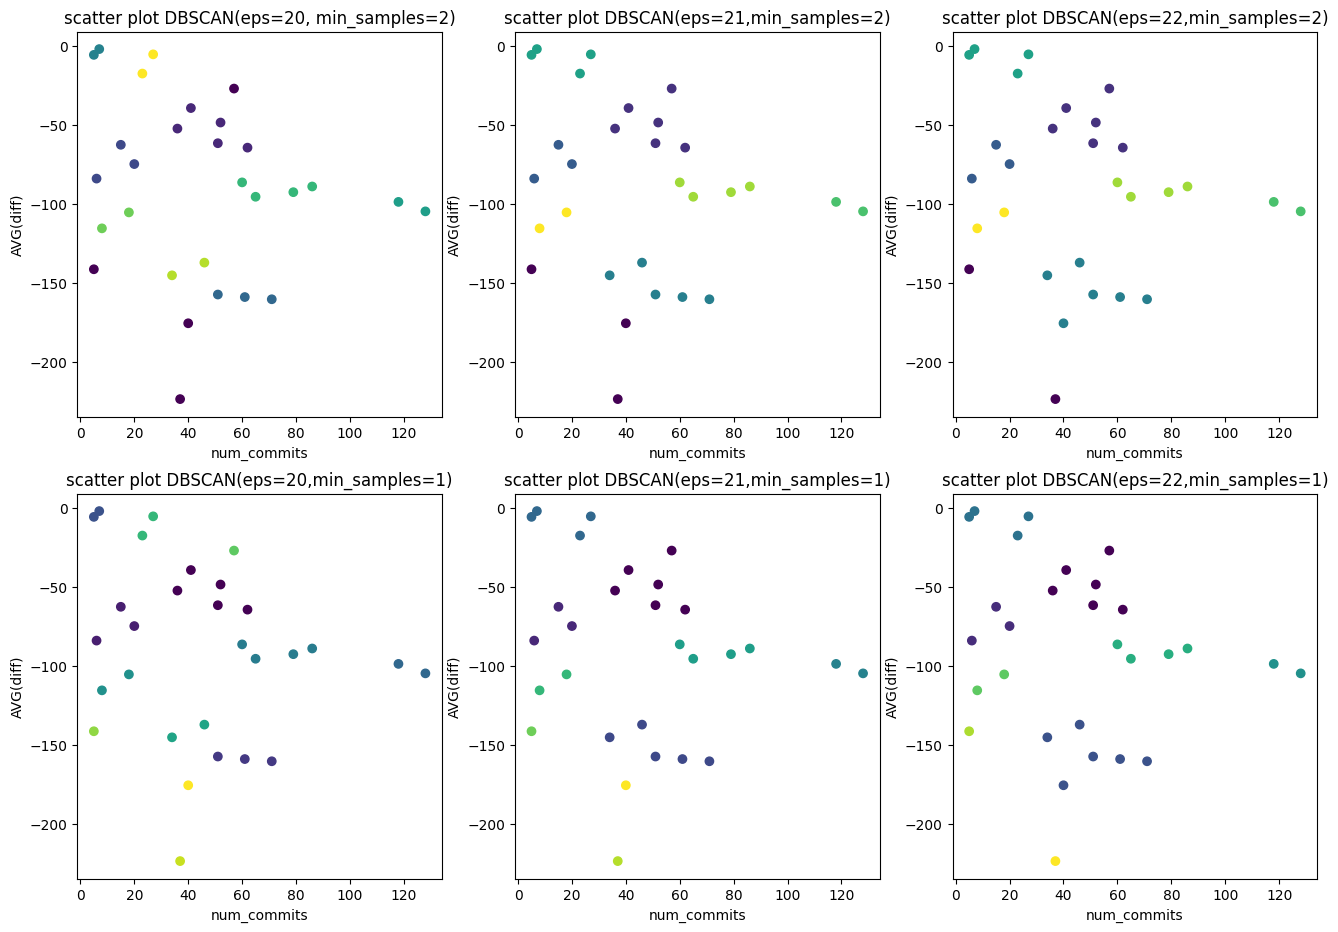

In [62]:
plt.figure(figsize=(16,11))
ax=plt.subplot(2, 3, 1)
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=20, min_samples=2)')

plt.subplot(2, 3, 2)
db21 = DBSCAN(eps=21, min_samples=2)
db21.fit(x)
ldb21=db21.labels_
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb21)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=21,min_samples=2)')


plt.subplot(2, 3, 3)
db22 = DBSCAN(eps=22, min_samples=2)
db22.fit(x)
ldb22=db22.labels_
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb22)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=22,min_samples=2)')


plt.subplot(2, 3, 4)
db22n = DBSCAN(eps=20, min_samples=1)
db22n.fit(x)
ldb22n=db22n.labels_
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb22n)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=20,min_samples=1)')


plt.subplot(2, 3, 5)
db21m = DBSCAN(eps=21, min_samples=1)
db21m.fit(x)
ldb21m=db21m.labels_
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb21m)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=21,min_samples=1)')


plt.subplot(2, 3, 6)
db22nd = DBSCAN(eps=22, min_samples=1)
db22nd.fit(x)
ldb22nd=db22nd.labels_
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=ldb22nd)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot DBSCAN(eps=22,min_samples=1)')

plt.show()



In [63]:
silhouette_dbscan = silhouette_score(x, db.labels_)
print(silhouette_dbscan)

0.38339641455696616


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [68]:
hierarchical=AgglomerativeClustering(n_clusters=5)
hierarchical.fit(x)

AgglomerativeClustering(n_clusters=5)

In [69]:
lhier=hierarchical.labels_

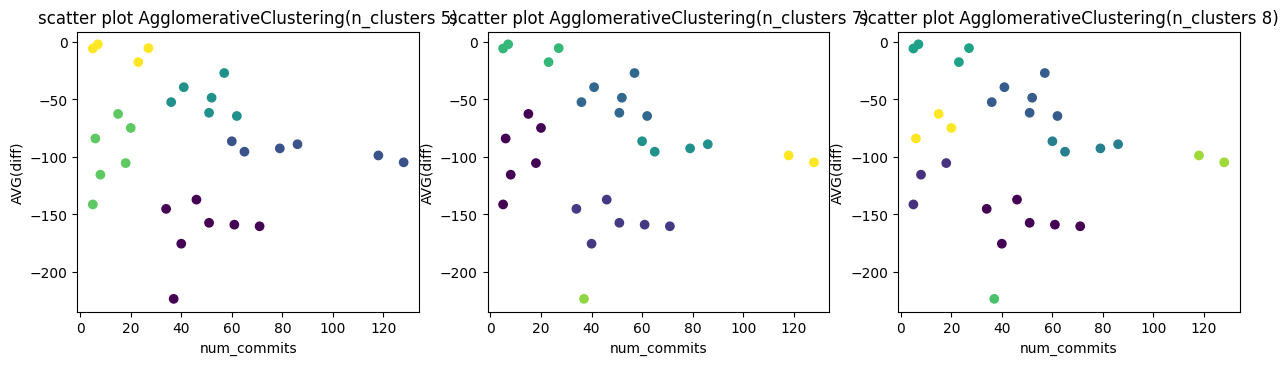

In [70]:
plt.figure(figsize=(15,8))
ax=plt.subplot(2, 3, 1)
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=lhier)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot AgglomerativeClustering(n_clusters 5)')

hierarchical7=AgglomerativeClustering(n_clusters=7)
hierarchical7.fit(x)
lh7=hierarchical7.labels_

plt.subplot(2, 3, 2)
plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=lh7)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot AgglomerativeClustering(n_clusters 7)')

hierarchical8=AgglomerativeClustering(n_clusters=8)
hierarchical8.fit(x)
lh8=hierarchical8.labels_

plt.subplot(2, 3, 3)

plt.scatter(x=df['num_commits'], y=df['AVG(diff)'], c=lh8)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('scatter plot AgglomerativeClustering(n_clusters 8)')
plt.show()


In [71]:
silhouette_hier = silhouette_score(x, hierarchical.labels_)
print(silhouette_hier)

0.46383015199381467


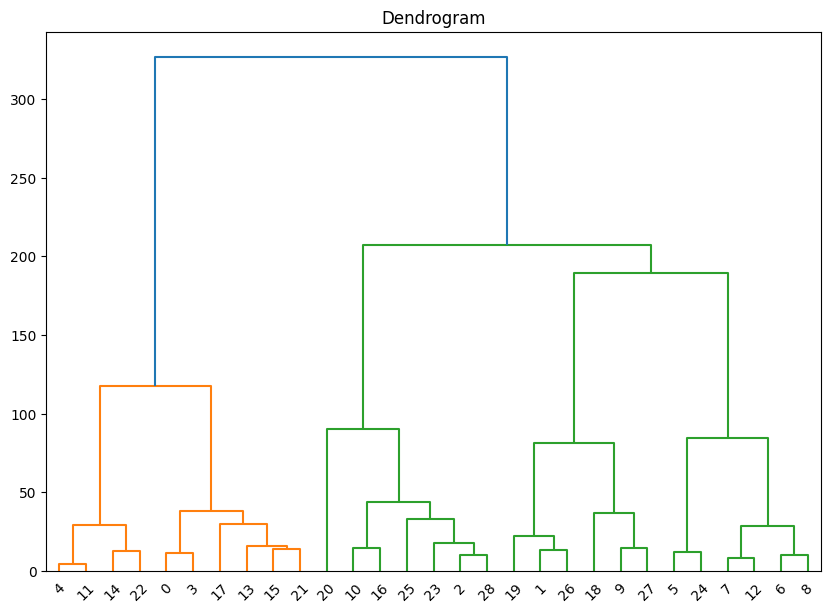

In [72]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
clusters = shc.linkage(df[['num_commits','AVG(diff)']], 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()